In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

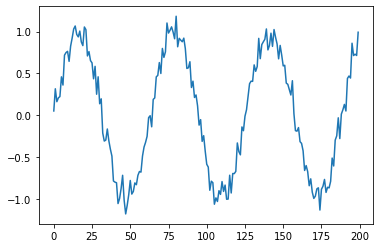

In [13]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

In [14]:
# Dataset Creation
X = []
Y = []
T = 10
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X Shape:", X.shape, " Y Shape: ", Y.shape)

X Shape: (190, 10)  Y Shape:  (190,)


In [15]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(inputs=i, outputs=x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))
r = model.fit(X[:-N//2], Y[:-N//2],
            epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 70ms/step - loss: 0.2746 - val_loss: 0.1702
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1119 - val_loss: 0.1227
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1643 - val_loss: 0.0478
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0574 - val_loss: 0.1105
Epoch 5/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1347 - val_loss: 0.0380
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0610 - val_loss: 0.0732
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0764 - val_loss: 0.0376
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0533 - val_loss: 0.0427
Epoch 9/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0488 - val_loss: 0.0387
Epoch 10/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0427 - val_loss: 0.0336
Epoch 11/80
3/3 [============

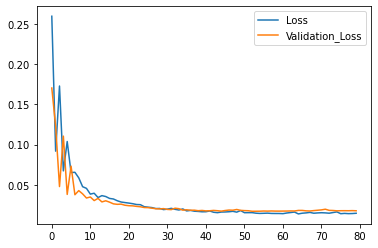

In [16]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation_Loss')
plt.legend()
plt.show()

In [17]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction) < len(validation_target):
    p =model.predict(last_x.reshape(1,-1))[0,0]
    validation_prediction.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p 


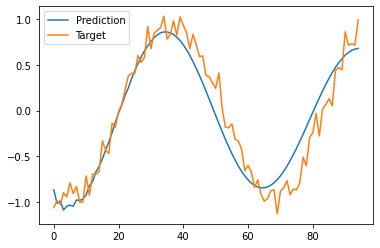

In [18]:
plt.plot(validation_prediction, label='Prediction')
plt.plot(validation_target, label='Target')
plt.legend()
plt.show()